# Conocimiento de datos de violencia armada en Colombia 🌍🗾

## Importación de Librerias

In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np
!pip install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Lectura de Datos 📄

[monitor.unocha][def]

[def]: https://monitor.unocha.org/colombia

In [ ]:
df = pd.read_csv("cuarto_intento.csv",sep=";")
df

,Id de evento,Tipo,Fecha Evento,Título evento,Descripcion y Resumen Evento,Categorias,Subcategorias,Doble/Multiple Afectacion,Resolucion 1612,Resolucion 1820,...,Ocupacion,Etnia,Grupo poblacional,Edad,Estado,Condicion,Fecha de fuente,Tipo de fuente,Nombre de fuente,Fuente
0,1,Violencia,2024-01-03T00:00:00,Un soldado muerto y 12 heridos en ataque del C...,.Antioquia-Turbo-miércoles 3 enero 2024,Acciones armadas,Emboscada,No,No,No,...,Combatiente,Sin información,Población en general,Mayor de 18 años,Muerto,Militar,3/01/2024,Prensa,El Tiempo,https://www.eltiempo.com/colombia/medellin/ant...
1,2,Violencia,2024-01-03T00:00:00,Un soldado muerto y 12 heridos en ataque del C...,.Antioquia-Turbo-miércoles 3 enero 2024,Acciones armadas,Emboscada,No,No,No,...,Combatiente,Sin información,Población en general,Mayor de 18 años,Herido,Militar,3/01/2024,Prensa,El Tiempo,https://www.eltiempo.com/colombia/medellin/ant...
2,3,Violencia,2024-01-01T00:00:00,Asesinan a migrante venezolana en Medellín,.Antioquia-Medellín-lunes 1 enero 2024,Ataques contra la población civil,Homicidio intencional en persona protegida,No,No,Si,...,Desconocida,Sin información,Extranjero - Refugiado y Migrante (Venezolano),Mayor de 18 años,Muerto,Civil,2/01/2024,Prensa,Alerta Paisa,https://www.alertapaisa.com/noticias/valle-de-...
3,4,Violencia,2024-01-01T00:00:00,"Asesinan a un hombre en Copacabana, Antioquia",.Antioquia-Copacabana-lunes 1 enero 2024,Ataques contra la población civil,Homicidio intencional en persona protegida,No,No,No,...,Desconocida,Sin información,Población en general,Mayor de 18 años,Muerto,Civil,2/01/2024,Sociedad Civil,Analisisurbano.org,https://analisisurbano.org/lo-mataron-por-defe...
4,5,Violencia,2024-01-01T00:00:00,"Asesinan a un hombre en Girardota, Antioquia",.Antioquia-Girardota-lunes 1 enero 2024,Ataques contra la población civil,Homicidio intencional en persona protegida,No,No,No,...,Desconocida,Sin información,Población en general,Mayor de 18 años,Muerto,Desconocido,2/01/2024,Sociedad Civil,Analisisurbano.org,https://analisisurbano.org/a-oscar-javier-lo-m...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893,1894,Violencia,2024-06-25T00:00:00,"Comercio en corregimiento de El Bagre, Antioqu...",.Antioquia-El Bagre-martes 25 junio 2024,Ataques contra la población civil,Amenazas (individuales/colectivas),No,No,No,...,Comerciante,Sin información,Población en general,Mayor de 18 años,No aplica,Civil,25/06/2024,Radio,Caracol,https://caracol.com.co/2024/06/25/comercio-en-...
1894,1895,Violencia,2024-06-25T00:00:00,"Comercio en corregimiento de El Bagre, Antioqu...",.Antioquia-El Bagre-martes 25 junio 2024,Restricción al acceso humanitario,"Restricciones a la movilidad y sobre, u obstru...",No,No,No,...,Desconocida,Sin información,Población en general,Sin información,No aplica,Civil,25/06/2024,Radio,Caracol,https://caracol.com.co/2024/06/25/comercio-en-...
1895,1896,Violencia,2024-06-24T00:00:00,Dos jovenes fueron secuestrados por el clan de...,.Antioquia-Segovia-lunes 24 junio 2024,Ataques contra la población civil,Secuestro,No,No,No,...,Desconocida,Sin información,Población en general,Mayor de 18 años,Desconocido,Civil,24/06/2024,Radio,Caracol,https://caracol.com.co/2024/06/25/ellos-son-lo...
1896,1897,Violencia,2024-06-12T00:00:00,Confinamiento de poblaciones indigenas en Conv...,.Norte De Santander-Convención-miércoles 12 ju...,Restricción al acceso humanitario,Confinamiento/Bloqueo de comunidades,No,No,No,...,Otro,Indígena-Bari,Extranjero - Indígena binacional o plurinacional,Mayor de 18 años,No aplica,Desconocido,25/06/2024,Equipos Locales de Coordinación - ELC,ELC Norte de Santander,Sin Enlace


### Validación de Datos

In [ ]:
df["Edad"].unique()

array(['Mayor de 18 años', 'Sin información', 'Desconocido',
       'Menor de 18 años'], dtype=object)

### Conteo de Variables

In [ ]:
df["Edad"].value_counts()

Edad
Mayor de 18 años    924
Sin información     678
Menor de 18 años    212
Desconocido          82
Name: count, dtype: int64

In [ ]:
maping = {"Mayor de 18 años":1,"Sin información":1,"Menor de 18 años":0,"Desconocido":1}
cam = df["Edad"].replace(maping)

In [ ]:
df["Fecha Evento"] = pd.to_datetime(df["Fecha Evento"])
df["Longitud"] = pd.to_numeric(df["Longitud"])
df["Latitud"] = pd.to_numeric(df["Latitud"])
df["Edad"] = pd.to_numeric(df["Edad"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896 entries, 0 to 1897
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Id de evento                  1896 non-null   int64         
 1   Tipo                          1896 non-null   object        
 2   Fecha Evento                  1896 non-null   datetime64[ns]
 3   Título evento                 1896 non-null   object        
 4   Descripcion y Resumen Evento  1896 non-null   object        
 5   Categorias                    1896 non-null   object        
 6   Subcategorias                 1896 non-null   object        
 7   Doble/Multiple Afectacion     1896 non-null   object        
 8   Resolucion 1612               1896 non-null   object        
 9   Resolucion 1820               1896 non-null   object        
 10  Departmento                   1896 non-null   object        
 11  Municipio                     1896 

C:\Users\dafer\AppData\Local\Temp\ipykernel_7408\1269636785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Fecha Evento"] = pd.to_datetime(df["Fecha Evento"])
C:\Users\dafer\AppData\Local\Temp\ipykernel_7408\1269636785.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Longitud"] = pd.to_numeric(df["Longitud"])
C:\Users\dafer\AppData\Local\Temp\ipykernel_7408\1269636785.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [ ]:
df.describe

<bound method NDFrame.describe of       Id de evento       Tipo Fecha Evento  \
0                1  Violencia   2024-01-03   
1                2  Violencia   2024-01-03   
2                3  Violencia   2024-01-01   
3                4  Violencia   2024-01-01   
4                5  Violencia   2024-01-01   
...            ...        ...          ...   
1893          1894  Violencia   2024-06-25   
1894          1895  Violencia   2024-06-25   
1895          1896  Violencia   2024-06-24   
1896          1897  Violencia   2024-06-12   
1897          1898  Violencia   2024-06-25   

                                          Título evento  \
0     Un soldado muerto y 12 heridos en ataque del C...   
1     Un soldado muerto y 12 heridos en ataque del C...   
2            Asesinan a migrante venezolana en Medellín   
3         Asesinan a un hombre en Copacabana, Antioquia   
4          Asesinan a un hombre en Girardota, Antioquia   
...                                                 ...   


In [ ]:
df["Categorias"].value_counts(ascending=False,dropna=False)

Categorias
Ataques contra la población civil        965
Acciones armadas                         340
Restricción al acceso humanitario        233
Desplazamiento forzado                   189
Uso de artefactos explosivos             112
Ataque a objetivos ilícitos de guerra     32
Categorías Complementarias                23
Temporada de lluvías                       2
Name: count, dtype: int64

In [ ]:
df["Subcategorias"].value_counts(ascending=False,dropna=False)

Subcategorias
Homicidio intencional en persona protegida                                                                             433
Desplazamientos masivos                                                                                                153
Amenazas (individuales/colectivas)                                                                                     152
Confinamiento/Bloqueo de comunidades                                                                                   110
Enfrentamiento entre actores no estatales                                                                              109
Secuestro                                                                                                              105
Combates                                                                                                               103
Atentado                                                                                                                81
Ho

In [ ]:
df.dtypes.value_counts()

object            20
int64              4
float64            2
datetime64[ns]     1
Name: count, dtype: int64

In [ ]:
acciones_armadas = df.groupby("Municipio")["Categorias"].agg(["count"])
acciones_armadas.sort_values(ascending=False,by="count")

,count
Municipio,
Tame,84
Argelia,47
Cumbitara,45
Cúcuta,43
Arauquita,35
...,...
Puerto Rico,1
Puerto Nariño,1
Puerto López,1


In [ ]:
acciones_armadas = df.groupby("Municipio")["Edad"].agg(["sum"])
acciones_armadas.sort_values(ascending=False,by="sum")

,sum
Municipio,
Tame,74
Cumbitara,43
Argelia,43
Cúcuta,42
Quibdó,32
...,...
Puerto Wilches,0
Guadalupe,0
Campoalegre,0


# Variables observadas

In [ ]:
df.shape

(1896, 27)

In [ ]:
df.isnull().any()

Id de evento                    False
Tipo                            False
Fecha Evento                    False
Título evento                   False
Descripcion y Resumen Evento    False
Categorias                      False
Subcategorias                   False
Doble/Multiple Afectacion       False
Resolucion 1612                 False
Resolucion 1820                 False
Departmento                     False
Municipio                       False
Latitud                         False
Longitud                        False
Numero de afectados             False
Genero                          False
Familia                         False
Ocupacion                       False
Etnia                           False
Grupo poblacional               False
Edad                            False
Estado                          False
Condicion                       False
Fecha de fuente                 False
Tipo de fuente                  False
Nombre de fuente                False
Fuente      

In [ ]:
df.isnull().sum().sort_values(ascending=False)

Id de evento                    0
Numero de afectados             0
Nombre de fuente                0
Tipo de fuente                  0
Fecha de fuente                 0
Condicion                       0
Estado                          0
Edad                            0
Grupo poblacional               0
Etnia                           0
Ocupacion                       0
Familia                         0
Genero                          0
Longitud                        0
Tipo                            0
Latitud                         0
Municipio                       0
Departmento                     0
Resolucion 1820                 0
Resolucion 1612                 0
Doble/Multiple Afectacion       0
Subcategorias                   0
Categorias                      0
Descripcion y Resumen Evento    0
Título evento                   0
Fecha Evento                    0
Fuente                          0
dtype: int64

### Identificación de valores nulos

In [ ]:
df.isnull().sum().sum()

0

C:\Users\dafer\Documents\13_udemy\03_codigo\venv2\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\dafer\Documents\13_udemy\03_codigo\venv2\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


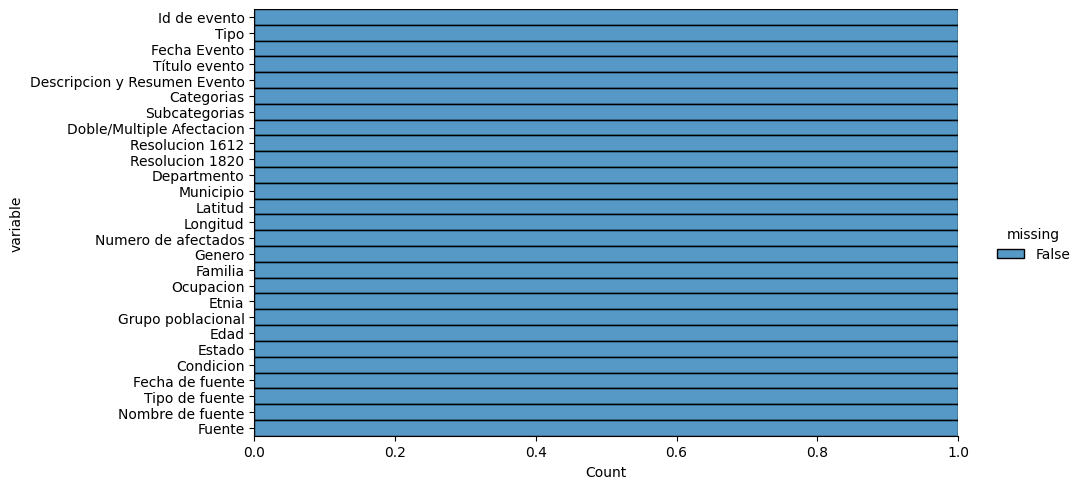

In [ ]:
(df.isnull().melt(value_name='missing').pipe(lambda df: (sns.displot(data=df,y='variable',hue='missing',multiple='fill',aspect=2))))

In [ ]:
df = (df.dropna())
df

,Id de evento,Tipo,Fecha Evento,Título evento,Descripcion y Resumen Evento,Categorias,Subcategorias,Doble/Multiple Afectacion,Resolucion 1612,Resolucion 1820,...,Ocupacion,Etnia,Grupo poblacional,Edad,Estado,Condicion,Fecha de fuente,Tipo de fuente,Nombre de fuente,Fuente
0,1,Violencia,2024-01-03,Un soldado muerto y 12 heridos en ataque del C...,.Antioquia-Turbo-miércoles 3 enero 2024,Acciones armadas,Emboscada,No,No,No,...,Combatiente,Sin información,Población en general,1,Muerto,Militar,3/01/2024,Prensa,El Tiempo,https://www.eltiempo.com/colombia/medellin/ant...
1,2,Violencia,2024-01-03,Un soldado muerto y 12 heridos en ataque del C...,.Antioquia-Turbo-miércoles 3 enero 2024,Acciones armadas,Emboscada,No,No,No,...,Combatiente,Sin información,Población en general,1,Herido,Militar,3/01/2024,Prensa,El Tiempo,https://www.eltiempo.com/colombia/medellin/ant...
2,3,Violencia,2024-01-01,Asesinan a migrante venezolana en Medellín,.Antioquia-Medellín-lunes 1 enero 2024,Ataques contra la población civil,Homicidio intencional en persona protegida,No,No,Si,...,Desconocida,Sin información,Extranjero - Refugiado y Migrante (Venezolano),1,Muerto,Civil,2/01/2024,Prensa,Alerta Paisa,https://www.alertapaisa.com/noticias/valle-de-...
3,4,Violencia,2024-01-01,"Asesinan a un hombre en Copacabana, Antioquia",.Antioquia-Copacabana-lunes 1 enero 2024,Ataques contra la población civil,Homicidio intencional en persona protegida,No,No,No,...,Desconocida,Sin información,Población en general,1,Muerto,Civil,2/01/2024,Sociedad Civil,Analisisurbano.org,https://analisisurbano.org/lo-mataron-por-defe...
4,5,Violencia,2024-01-01,"Asesinan a un hombre en Girardota, Antioquia",.Antioquia-Girardota-lunes 1 enero 2024,Ataques contra la población civil,Homicidio intencional en persona protegida,No,No,No,...,Desconocida,Sin información,Población en general,1,Muerto,Desconocido,2/01/2024,Sociedad Civil,Analisisurbano.org,https://analisisurbano.org/a-oscar-javier-lo-m...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893,1894,Violencia,2024-06-25,"Comercio en corregimiento de El Bagre, Antioqu...",.Antioquia-El Bagre-martes 25 junio 2024,Ataques contra la población civil,Amenazas (individuales/colectivas),No,No,No,...,Comerciante,Sin información,Población en general,1,No aplica,Civil,25/06/2024,Radio,Caracol,https://caracol.com.co/2024/06/25/comercio-en-...
1894,1895,Violencia,2024-06-25,"Comercio en corregimiento de El Bagre, Antioqu...",.Antioquia-El Bagre-martes 25 junio 2024,Restricción al acceso humanitario,"Restricciones a la movilidad y sobre, u obstru...",No,No,No,...,Desconocida,Sin información,Población en general,1,No aplica,Civil,25/06/2024,Radio,Caracol,https://caracol.com.co/2024/06/25/comercio-en-...
1895,1896,Violencia,2024-06-24,Dos jovenes fueron secuestrados por el clan de...,.Antioquia-Segovia-lunes 24 junio 2024,Ataques contra la población civil,Secuestro,No,No,No,...,Desconocida,Sin información,Población en general,1,Desconocido,Civil,24/06/2024,Radio,Caracol,https://caracol.com.co/2024/06/25/ellos-son-lo...
1896,1897,Violencia,2024-06-12,Confinamiento de poblaciones indigenas en Conv...,.Norte De Santander-Convención-miércoles 12 ju...,Restricción al acceso humanitario,Confinamiento/Bloqueo de comunidades,No,No,No,...,Otro,Indígena-Bari,Extranjero - Indígena binacional o plurinacional,1,No aplica,Desconocido,25/06/2024,Equipos Locales de Coordinación - ELC,ELC Norte de Santander,Sin Enlace


In [ ]:
df.describe(include="all")

,Id de evento,Tipo,Fecha Evento,Título evento,Descripcion y Resumen Evento,Categorias,Subcategorias,Doble/Multiple Afectacion,Resolucion 1612,Resolucion 1820,...,Ocupacion,Etnia,Grupo poblacional,Edad,Estado,Condicion,Fecha de fuente,Tipo de fuente,Nombre de fuente,Fuente
count,1896.000000,1896,1896,1896,1896,1896,1896,1896,1896,1896,...,1896,1896,1896,1896.000000,1896,1896,1896,1896,1896,1896
unique,NaN,1,NaN,1223,1157,8,40,2,2,2,...,28,37,7,NaN,4,5,199,25,143,896
top,NaN,Violencia,NaN,Incursión armada de GANE en Tame,.Arauca-Tame-domingo 31 marzo 2024,Ataques contra la población civil,Homicidio intencional en persona protegida,No,No,No,...,Sin Información,Sin información,Población en general,NaN,No aplica,Civil,5/04/2024,Prensa,Alcaldía,Sin Enlace
freq,NaN,1896,NaN,19,19,965,433,1807,1287,1891,...,857,1586,1020,NaN,986,903,37,754,226,559
mean,949.906646,NaN,2024-03-21 13:16:42.531645696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.888186,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,2024-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,475.750000,NaN,2024-02-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,949.500000,NaN,2024-03-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,1424.250000,NaN,2024-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,1898.000000,NaN,2024-06-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


## Conteo y Proporciones

In [ ]:
df.describe(include=[np.number])

,Id de evento,Latitud,Longitud,Numero de afectados,Familia,Edad
count,1896.000000,1896.000000,1896.000000,1896.000000,1896.000000,1896.000000
mean,949.906646,4.605093,-75.269698,139.219409,17.710970,0.888186
std,548.015991,2.861111,2.159865,871.907237,111.239179,0.315221
min,1.000000,-4.215000,-78.764722,0.000000,0.000000,0.000000
25%,475.750000,2.115278,-76.693611,1.000000,0.000000,1.000000
50%,949.500000,4.446111,-75.993056,1.000000,0.000000,1.000000
75%,1424.250000,7.026111,-73.866667,3.000000,0.000000,1.000000
max,1898.000000,11.544167,-67.483742,15000.000000,2800.000000,1.000000


In [ ]:
df.describe(include=object)

,Tipo,Título evento,Descripcion y Resumen Evento,Categorias,Subcategorias,Doble/Multiple Afectacion,Resolucion 1612,Resolucion 1820,Departmento,Municipio,...,Ocupacion,Etnia,Grupo poblacional,Edad,Estado,Condicion,Fecha de fuente,Tipo de fuente,Nombre de fuente,Fuente
count,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,...,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896
unique,1,1223,1157,8,40,2,2,2,26,275,...,28,37,7,4,4,5,199,25,143,896
top,Violencia,Incursión armada de GANE en Tame,.Arauca-Tame-domingo 31 marzo 2024,Ataques contra la población civil,Homicidio intencional en persona protegida,No,No,No,Cauca,Tame,...,Sin Información,Sin información,Población en general,Mayor de 18 años,No aplica,Civil,5/04/2024,Prensa,Alcaldía,Sin Enlace
freq,1896,19,19,965,433,1807,1287,1891,306,84,...,857,1586,1020,924,986,903,37,754,226,559


In [ ]:
df.astype(
    {
        "Categorias":"category",
        "Subcategorias":"category",
        "Condicion":"category"
    }
).describe(include=["category",object])

,Tipo,Título evento,Descripcion y Resumen Evento,Categorias,Subcategorias,Doble/Multiple Afectacion,Resolucion 1612,Resolucion 1820,Departmento,Municipio,...,Ocupacion,Etnia,Grupo poblacional,Edad,Estado,Condicion,Fecha de fuente,Tipo de fuente,Nombre de fuente,Fuente
count,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,...,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896
unique,1,1223,1157,8,40,2,2,2,26,275,...,28,37,7,4,4,5,199,25,143,896
top,Violencia,Incursión armada de GANE en Tame,.Arauca-Tame-domingo 31 marzo 2024,Ataques contra la población civil,Homicidio intencional en persona protegida,No,No,No,Cauca,Tame,...,Sin Información,Sin información,Población en general,Mayor de 18 años,No aplica,Civil,5/04/2024,Prensa,Alcaldía,Sin Enlace
freq,1896,19,19,965,433,1807,1287,1891,306,84,...,857,1586,1020,924,986,903,37,754,226,559


## Vizualización

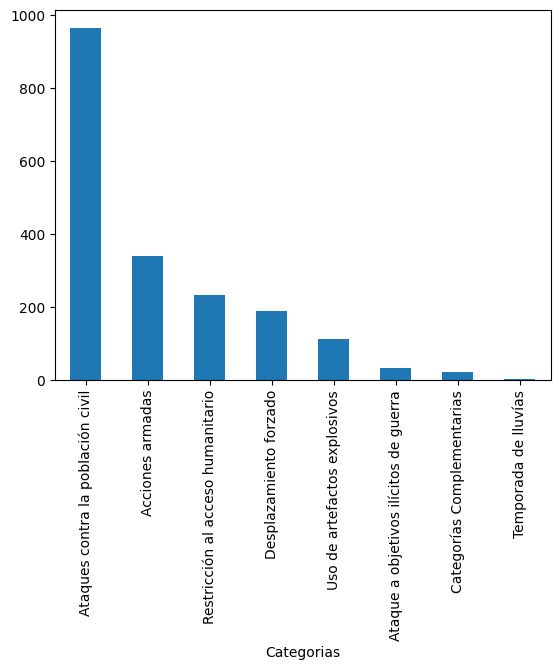

In [ ]:
df.Categorias.value_counts().plot(kind="bar");

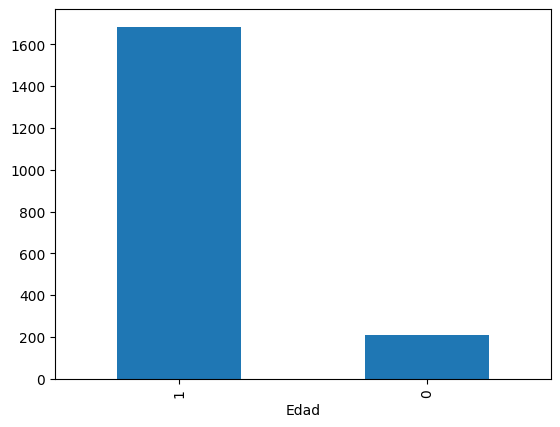

In [ ]:
df.Edad.value_counts().plot(kind="bar");

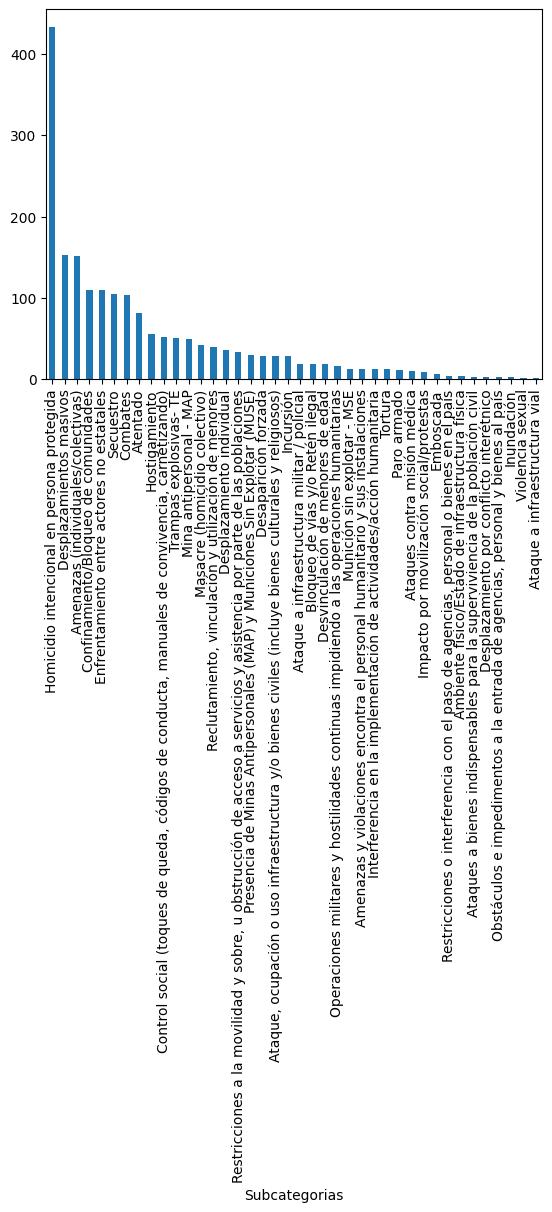

In [ ]:
df.Subcategorias.value_counts().plot(kind="bar");

# Uso de Geopandas

In [ ]:
import geopandas as gpd

In [ ]:
gdf = gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.Longitud,df.Latitud),crs='EPSG:4326')
gdf.head()

,Id de evento,Tipo,Fecha Evento,Título evento,Descripcion y Resumen Evento,Categorias,Subcategorias,Doble/Multiple Afectacion,Resolucion 1612,Resolucion 1820,...,Etnia,Grupo poblacional,Edad,Estado,Condicion,Fecha de fuente,Tipo de fuente,Nombre de fuente,Fuente,geometry
0,1,Violencia,2024-01-03,Un soldado muerto y 12 heridos en ataque del C...,.Antioquia-Turbo-miércoles 3 enero 2024,Acciones armadas,Emboscada,No,No,No,...,Sin información,Población en general,Mayor de 18 años,Muerto,Militar,3/01/2024,Prensa,El Tiempo,https://www.eltiempo.com/colombia/medellin/ant...,POINT (-76.72833 8.09306)
1,2,Violencia,2024-01-03,Un soldado muerto y 12 heridos en ataque del C...,.Antioquia-Turbo-miércoles 3 enero 2024,Acciones armadas,Emboscada,No,No,No,...,Sin información,Población en general,Mayor de 18 años,Herido,Militar,3/01/2024,Prensa,El Tiempo,https://www.eltiempo.com/colombia/medellin/ant...,POINT (-76.72833 8.09306)
2,3,Violencia,2024-01-01,Asesinan a migrante venezolana en Medellín,.Antioquia-Medellín-lunes 1 enero 2024,Ataques contra la población civil,Homicidio intencional en persona protegida,No,No,Si,...,Sin información,Extranjero - Refugiado y Migrante (Venezolano),Mayor de 18 años,Muerto,Civil,2/01/2024,Prensa,Alerta Paisa,https://www.alertapaisa.com/noticias/valle-de-...,POINT (-75.57483 6.24475)
3,4,Violencia,2024-01-01,"Asesinan a un hombre en Copacabana, Antioquia",.Antioquia-Copacabana-lunes 1 enero 2024,Ataques contra la población civil,Homicidio intencional en persona protegida,No,No,No,...,Sin información,Población en general,Mayor de 18 años,Muerto,Civil,2/01/2024,Sociedad Civil,Analisisurbano.org,https://analisisurbano.org/lo-mataron-por-defe...,POINT (-75.51028 6.34861)
4,5,Violencia,2024-01-01,"Asesinan a un hombre en Girardota, Antioquia",.Antioquia-Girardota-lunes 1 enero 2024,Ataques contra la población civil,Homicidio intencional en persona protegida,No,No,No,...,Sin información,Población en general,Mayor de 18 años,Muerto,Desconocido,2/01/2024,Sociedad Civil,Analisisurbano.org,https://analisisurbano.org/a-oscar-javier-lo-m...,POINT (-75.44611 6.37694)


<Axes: >

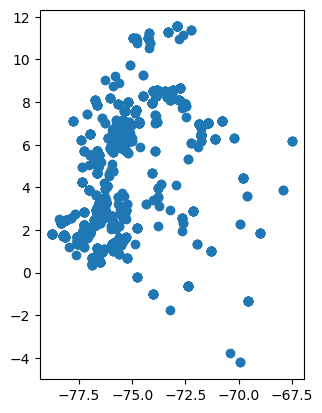

In [ ]:
gdf.plot()

In [ ]:
deptos = gpd.read_file(r"C:\Users\dafer\Documents\13_udemy\16_geo_cositas\01_geopandas\shape\Departamentos.zip")
new_crxs = 'EPSG:4326'
deptos_reproject = deptos.to_crs(new_crxs)

# Vizualización Mapa y datos Colombia

<Axes: >

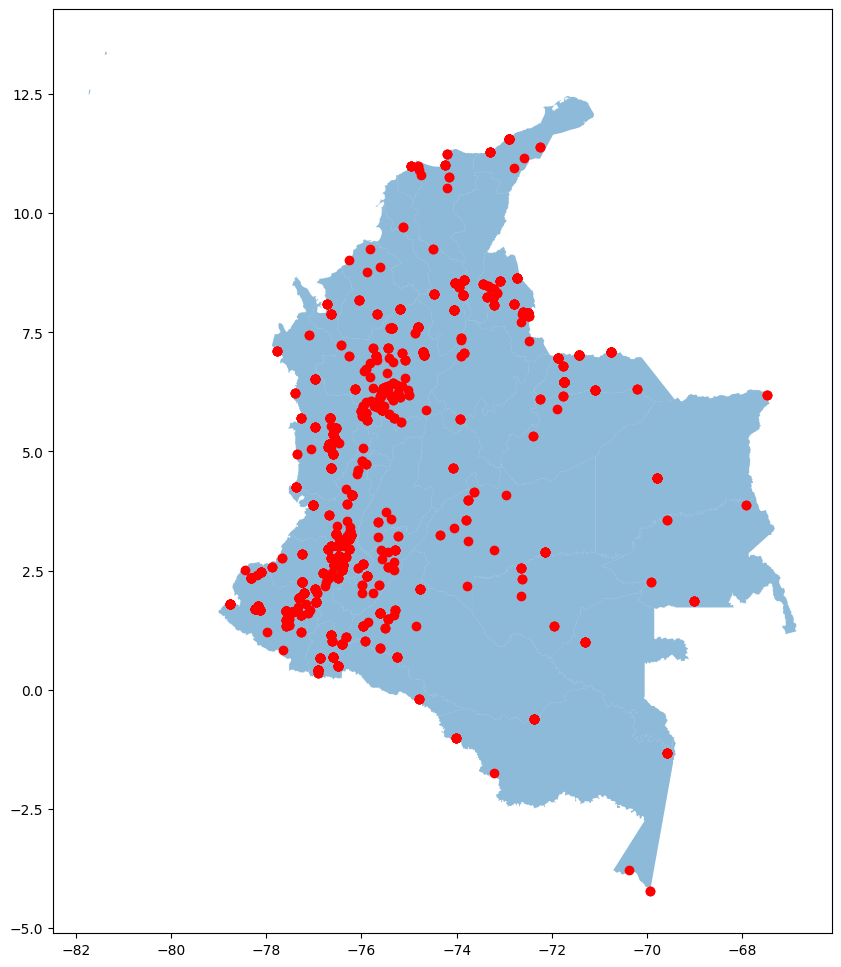

In [ ]:
axis = deptos_reproject.plot(figsize=(20,12),alpha=0.5)
gdf.plot(ax=axis,color="red")

# Análisis de Variables

sns.scatterplot(
    datagdff,
    xNumero de afectadosmm',
    Fecha Evento_mm'
)

<Axes: xlabel='Fecha Evento', ylabel='Numero de afectados'>

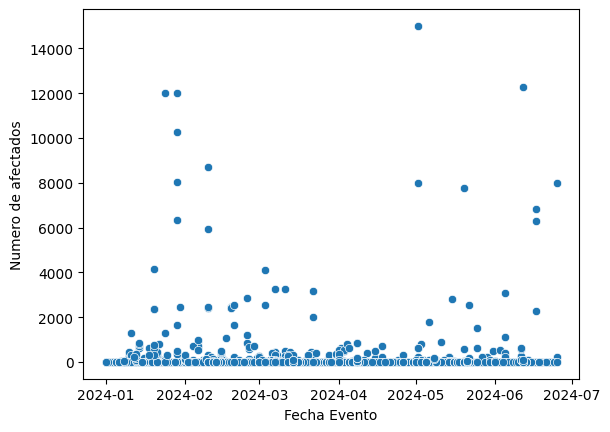

In [31]:
sns.scatterplot(
    data=gdf,
    x='Fecha Evento',
    y='Numero de afectados'
)

In [171]:
acciones_armadas_victimas = df.groupby("Fecha Evento")["Numero de afectados"].agg(["sum"])
acciones_armadas_fecha = df.groupby("Fecha Evento")["Subcategorias"].agg(["count"])
acc_dep = df.groupby("Departmento")["Fecha Evento"]
acc = pd.DataFrame(acc_dep)

In [172]:
df_conteo = pd.DataFrame()
df_conteo["acciones_fecha"]= acciones_armadas_fecha
df_conteo["acciones_victimas"]= acciones_armadas_victimas
df_conteo["dpto"] = acc[0][0]
df_conteo.head()

,acciones_fecha,acciones_victimas,dpto
Fecha Evento,,,
2024-01-01,8,9,Amazonas
2024-01-02,7,8,Amazonas
2024-01-03,10,22,Amazonas
2024-01-04,4,5,Amazonas
2024-01-05,8,7,Amazonas


In [180]:
df_conteo.describe

<bound method NDFrame.describe of               acciones_fecha  acciones_victimas      dpto
Fecha Evento                                             
2024-01-01                 8                  9  Amazonas
2024-01-02                 7                  8  Amazonas
2024-01-03                10                 22  Amazonas
2024-01-04                 4                  5  Amazonas
2024-01-05                 8                  7  Amazonas
...                      ...                ...       ...
2024-06-21                 9                 23  Amazonas
2024-06-22                 2                  1  Amazonas
2024-06-23                 3                  7  Amazonas
2024-06-24                 3                  3  Amazonas
2024-06-25                 3               8207  Amazonas

[177 rows x 3 columns]>

In [181]:
df_conteo.describe(include=object)

,dpto
count,177
unique,1
top,Amazonas
freq,177


In [185]:
df_conteo.std

<bound method DataFrame.std of               acciones_fecha  acciones_victimas      dpto
Fecha Evento                                             
2024-01-01                 8                  9  Amazonas
2024-01-02                 7                  8  Amazonas
2024-01-03                10                 22  Amazonas
2024-01-04                 4                  5  Amazonas
2024-01-05                 8                  7  Amazonas
...                      ...                ...       ...
2024-06-21                 9                 23  Amazonas
2024-06-22                 2                  1  Amazonas
2024-06-23                 3                  7  Amazonas
2024-06-24                 3                  3  Amazonas
2024-06-25                 3               8207  Amazonas

[177 rows x 3 columns]>

In [173]:
acciones_armadas_fecha = df.groupby("Fecha Evento")["Categorias"].agg(["count"])
acciones_armadas_fecha.sort_values(ascending=False,by="count")


,count
Fecha Evento,
2024-03-07,43
2024-04-01,29
2024-05-20,28
2024-04-05,27
2024-02-26,26
...,...
2024-06-07,2
2024-06-22,2
2024-03-09,2


<Axes: xlabel='acciones_fecha', ylabel='acciones_victimas'>

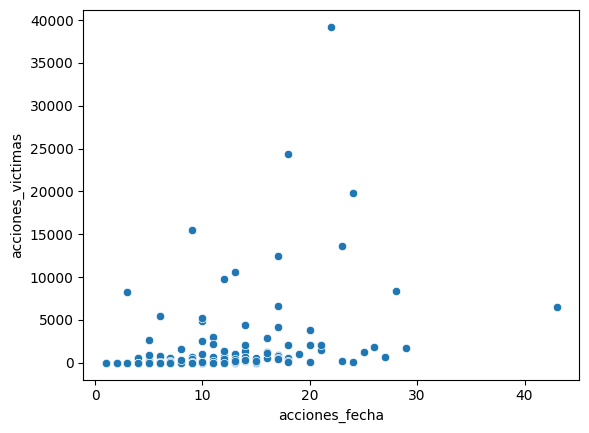

In [174]:
sns.scatterplot(
    data=df_conteo,
    x='acciones_fecha',
    y='acciones_victimas'
)

<Axes: xlabel='acciones_fecha', ylabel='acciones_victimas'>

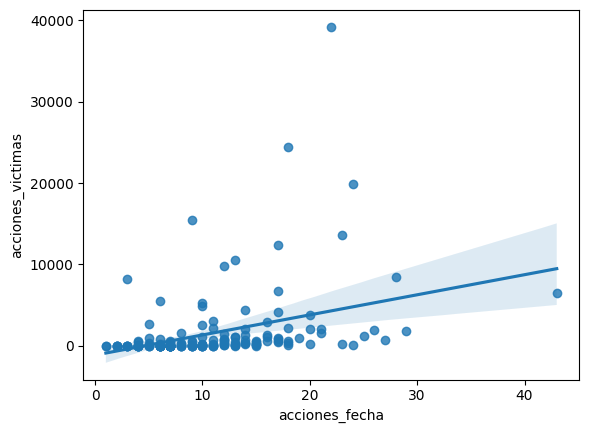

In [40]:
sns.regplot(
    data=df_conteo,
    x='acciones_fecha',
    y='acciones_victimas'
)

In [41]:
lista = gdf["Categorias"].unique().tolist()
lista

['Acciones armadas',
 'Ataques contra la población civil',
 'Restricción al acceso humanitario',
 'Uso de artefactos explosivos',
 'Desplazamiento forzado',
 'Ataque a objetivos ilícitos de guerra',
 'Categorías Complementarias',
 'Temporada de lluvías']

In [175]:
gdf_violnecia = gpd.GeoDataFrame()
gdf_violnecia["geometry"] = gdf.geometry
gdf_violnecia["victimas"] = gdf["Numero de afectados"]
gdf_violnecia.set_geometry("geometry")

C:\Users\dafer\AppData\Local\Temp\ipykernel_7408\1538377028.py:2: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  gdf_violnecia["geometry"] = gdf.geometry


,geometry,victimas
0,POINT (-76.72833 8.09306),1
1,POINT (-76.72833 8.09306),12
2,POINT (-75.57483 6.24475),1
3,POINT (-75.51028 6.34861),1
4,POINT (-75.44611 6.37694),1
...,...,...
1893,POINT (-74.80861 7.60472),200
1894,POINT (-74.80861 7.60472),8000
1895,POINT (-74.70167 7.07806),2
1896,POINT (-73.33694 8.46806),70


In [238]:
predicate = gdf_violnecia.victimas
joined_df = gpd.sjoin(gdf_violnecia,deptos_reproject,how="right")
joined_df.head()

,index_left,victimas,DeCodigo,DeNombre,DeArea,DeNorma,Shape_Leng,Shape_Area,geometry
0,NaN,NaN,00,Area en Litigio Cauca - Huila,342.099087,Límite por Acuerdo Gobernadores Informe 1982,1.093000e+05,3.420991e+08,"POLYGON ((-76.34465 2.40313, -76.34158 2.40306..."
1,0.0,1.0,05,Antioquia,62786.020507,Constitución Política de Colombia 1886,2.356259e+06,6.278602e+10,"POLYGON ((-76.41356 8.74766, -76.41269 8.74732..."
1,1.0,12.0,05,Antioquia,62786.020507,Constitución Política de Colombia 1886,2.356259e+06,6.278602e+10,"POLYGON ((-76.41356 8.74766, -76.41269 8.74732..."
1,2.0,1.0,05,Antioquia,62786.020507,Constitución Política de Colombia 1886,2.356259e+06,6.278602e+10,"POLYGON ((-76.41356 8.74766, -76.41269 8.74732..."
1,3.0,1.0,05,Antioquia,62786.020507,Constitución Política de Colombia 1886,2.356259e+06,6.278602e+10,"POLYGON ((-76.41356 8.74766, -76.41269 8.74732..."


In [239]:
joined_df.shape

(1897, 9)

<Axes: xlabel='DeNombre'>

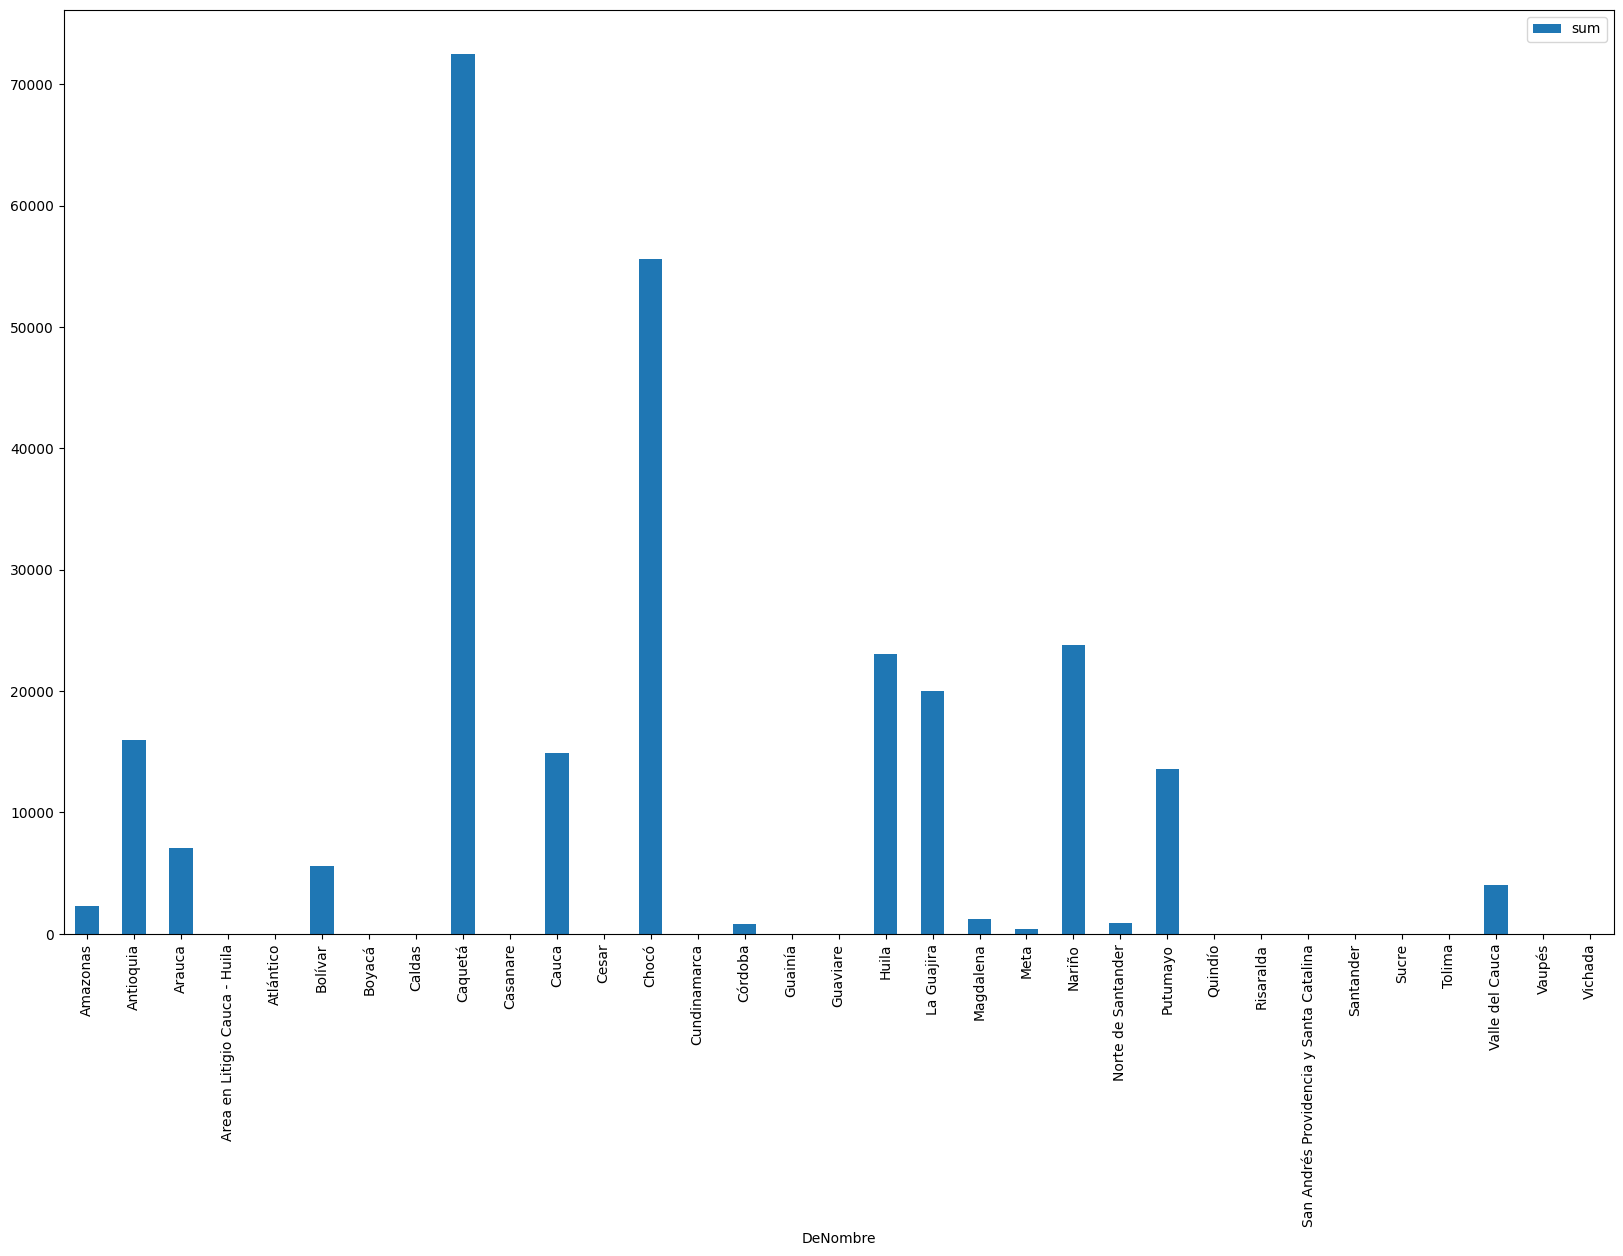

In [240]:
agregados_victimas_dpto = joined_df.groupby('DeNombre')['victimas'].agg(['sum'])
agregados_victimas_dpto.plot(kind="bar",figsize=(20,12))

## Análisis por Departamento Colombiano / Violencia Armada

C:\Users\dafer\Documents\13_udemy\03_codigo\venv2\Lib\site-packages\mapclassify\classifiers.py:1592: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 4.
  self.bins = quantile(y, k=k)


<Axes: >

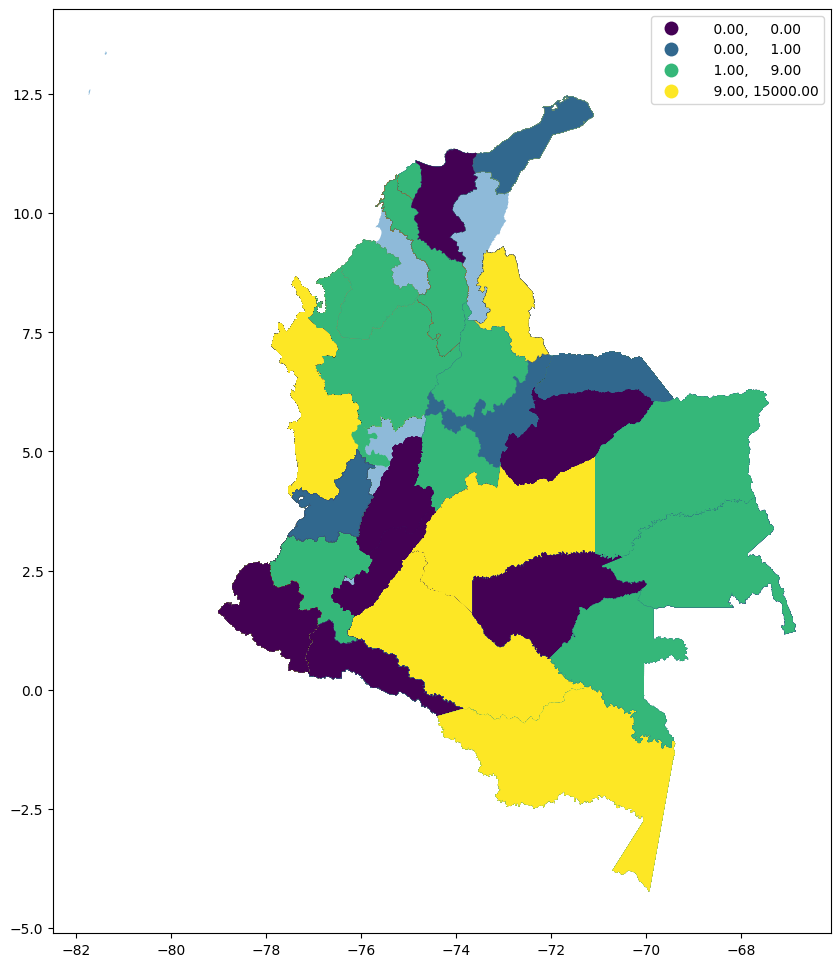

In [241]:
axis = deptos_reproject.plot(figsize=(20,12),alpha=0.5)
joined_df.plot(ax=axis,column='victimas', scheme='QUANTILES', k=5, figsize = (20, 12), legend = True)

In [47]:
joined_df.groupby("DeNombre")["victimas"].mean()

DeNombre
Amazonas                80.482759
Antioquia               59.170370
Arauca                  37.850267
Atlántico                1.818182
Bolívar                 60.565217
Boyacá                   1.500000
Caquetá               1188.606557
Casanare                 0.444444
Cauca                   48.735294
Chocó                  334.765060
Cundinamarca             1.200000
Córdoba                 55.428571
Guainía                  1.083333
Guaviare                 0.818182
Huila                  677.000000
La Guajira             475.928571
Magdalena               86.500000
Meta                    15.280000
Nariño                 100.447257
Norte de Santander       7.469565
Putumayo               111.213115
Risaralda                4.000000
Santander                1.500000
Tolima                   0.166667
Valle del Cauca         43.673913
Vaupés                   1.875000
Vichada                  1.642857
Name: victimas, dtype: float64

In [242]:
joined_df.groupby("DeNombre")["victimas"].min()

DeNombre
Amazonas                                   1.0
Antioquia                                  0.0
Arauca                                     0.0
Area en Litigio Cauca - Huila              NaN
Atlántico                                  1.0
Bolívar                                    0.0
Boyacá                                     0.0
Caldas                                     NaN
Caquetá                                    0.0
Casanare                                   0.0
Cauca                                      0.0
Cesar                                      NaN
Chocó                                      0.0
Cundinamarca                               1.0
Córdoba                                    1.0
Guainía                                    0.0
Guaviare                                   0.0
Huila                                      0.0
La Guajira                                 1.0
Magdalena                                  0.0
Meta                                       0.0
Nari

In [49]:
joined_df.groupby("DeNombre")["victimas"].max()

DeNombre
Amazonas                657
Antioquia              8000
Arauca                 3062
Atlántico                 3
Bolívar                1799
Boyacá                    3
Caquetá               12020
Casanare                  1
Cauca                  7780
Chocó                  8699
Cundinamarca              2
Córdoba                 700
Guainía                   3
Guaviare                  2
Huila                 15000
La Guajira            12259
Magdalena               600
Meta                    100
Nariño                 4102
Norte de Santander      200
Putumayo               4130
Risaralda                 4
Santander                 3
Tolima                    1
Valle del Cauca         800
Vaupés                    4
Vichada                   5
Name: victimas, dtype: int64

In [243]:
joined_df.groupby("DeNombre")["victimas"].std()

DeNombre
Amazonas                                    157.826899
Antioquia                                   513.262769
Arauca                                      242.793286
Area en Litigio Cauca - Huila                      NaN
Atlántico                                     0.873863
Bolívar                                     218.791350
Boyacá                                        1.290994
Caldas                                             NaN
Caquetá                                    2966.727458
Casanare                                      0.527046
Cauca                                       456.545071
Cesar                                              NaN
Chocó                                      1006.815814
Cundinamarca                                  0.447214
Córdoba                                     185.700219
Guainía                                       0.668558
Guaviare                                      0.750757
Huila                                      2878.429896
L

In [51]:
joined_df.groupby("DeNombre")["victimas"].quantile(0.25)

DeNombre
Amazonas              2.00
Antioquia             1.00
Arauca                1.00
Atlántico             1.00
Bolívar               0.75
Boyacá                0.75
Caquetá               0.00
Casanare              0.00
Cauca                 0.00
Chocó                 0.00
Cundinamarca          1.00
Córdoba               1.00
Guainía               1.00
Guaviare              0.00
Huila                 0.00
La Guajira            1.00
Magdalena             1.00
Meta                  0.00
Nariño                0.00
Norte de Santander    0.00
Putumayo              1.00
Risaralda             4.00
Santander             1.00
Tolima                0.00
Valle del Cauca       1.00
Vaupés                1.00
Vichada               1.00
Name: victimas, dtype: float64

In [244]:
joined_df.groupby("DeNombre")["victimas"].quantile(0.75)  - joined_df.groupby("DeNombre")["victimas"].quantile(0.25)

DeNombre
Amazonas                                    92.00
Antioquia                                    1.00
Arauca                                       1.00
Area en Litigio Cauca - Huila                 NaN
Atlántico                                    1.50
Bolívar                                     34.50
Boyacá                                       1.50
Caldas                                        NaN
Caquetá                                      2.00
Casanare                                     1.00
Cauca                                        2.00
Cesar                                         NaN
Chocó                                      112.00
Cundinamarca                                 0.00
Córdoba                                      9.75
Guainía                                      0.00
Guaviare                                     1.00
Huila                                        1.00
La Guajira                                   0.00
Magdalena                                

In [53]:
joined_df.groupby("DeNombre")["victimas"].median()

DeNombre
Amazonas              30.0
Antioquia              1.0
Arauca                 1.0
Atlántico              2.0
Bolívar                3.0
Boyacá                 1.5
Caquetá                1.0
Casanare               0.0
Cauca                  1.0
Chocó                  1.0
Cundinamarca           1.0
Córdoba                2.5
Guainía                1.0
Guaviare               1.0
Huila                  1.0
La Guajira             1.0
Magdalena              1.0
Meta                   1.0
Nariño                 1.0
Norte de Santander     1.0
Putumayo               1.0
Risaralda              4.0
Santander              1.0
Tolima                 0.0
Valle del Cauca        1.0
Vaupés                 1.5
Vichada                1.0
Name: victimas, dtype: float64

In [54]:
joined_df.describe()

,victimas,index_right,DeArea,Shape_Leng,Shape_Area
count,1896.000000,1891.000000,1891.000000,1.891000e+03,1.891000e+03
mean,139.219409,14.789001,38897.580348,1.661791e+06,3.889758e+10
std,871.907237,10.510031,20937.824828,4.965832e+05,2.093782e+10
min,0.000000,1.000000,3313.384461,2.792774e+05,3.313384e+09
25%,1.000000,7.000000,23716.799263,1.389590e+06,2.371680e+10
50%,1.000000,12.000000,30918.668571,1.551194e+06,3.091867e+10
75%,3.000000,23.000000,48428.101179,2.286068e+06,4.842810e+10
max,15000.000000,32.000000,108041.181326,2.796471e+06,1.080412e+11


<Axes: xlabel='DeNombre'>

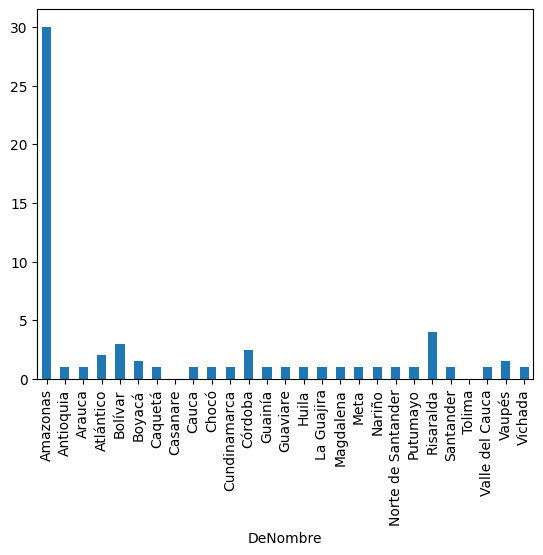

In [237]:
joined_df.groupby("DeNombre")["victimas"].median().plot(kind="bar")

<Axes: xlabel='acciones_fecha', ylabel='acciones_victimas'>

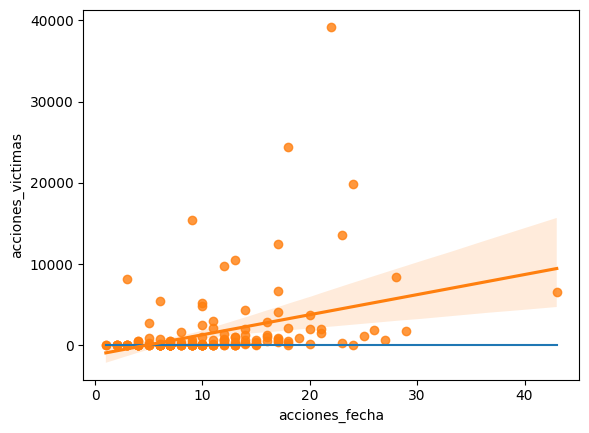

In [235]:
sns.ecdfplot(data=df_conteo,x="acciones_fecha")
sns.regplot(
    data=df_conteo,
    x='acciones_fecha',
    y='acciones_victimas',
)